In [1]:
# HIDDEN

from datascience import *
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

### Sampling from a Population ###

The law of averages also holds when the random sample is drawn from individuals in a large population.

As an example, we will study a population of flight delay times. The table `united` contains data for United Airlines domestic flights departing from San Francisco in the summer of 2015. The data are made publicly available by the [Bureau of Transportation Statistics](http://www.transtats.bts.gov/Fields.asp?Table_ID=293) in the United States Department of Transportation.

There are 13,825 rows, each corresponding to a flight. The columns are the date of the flight, the flight number, the destination airport code, and the departure delay time in minutes. Some delay times are negative; those flights left early.

In [2]:
united = Table.read_table('http://inferentialthinking.com/notebooks/united_summer2015.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


One flight departed 16 minutes early, and one was 580 minutes late. The other delay times were almost all between -10 minutes and 200 minutes, as the histogram below shows.

In [3]:
united.column('Delay').min()

-16

In [4]:
united.column('Delay').max()

580

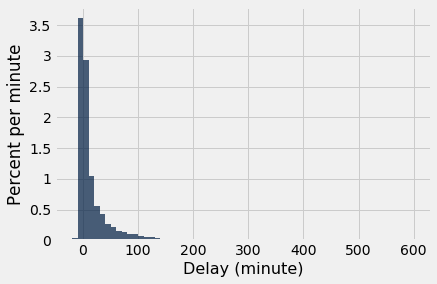

In [5]:
delay_bins = np.append(np.arange(-20, 301, 10), 600)
united.select('Delay').hist(bins = delay_bins, unit = 'minute')

For the purposes of this section, it is enough to zoom in on the bulk of the data and ignore the 0.8% of flights that had delays of more than 200 minutes. This restriction is just for visual convenience; the table still retains all the data.

In [6]:
united.where('Delay', are.above(200)).num_rows/united.num_rows

0.008390596745027125

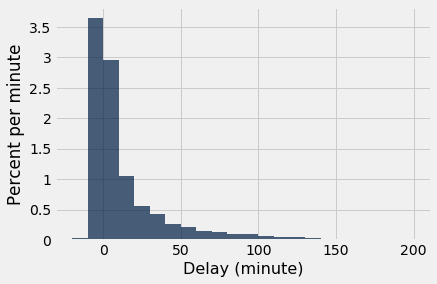

In [7]:
delay_bins = np.arange(-20, 201, 10)
united.select('Delay').hist(bins = delay_bins, unit = 'minute')

The height of the [0, 10) bar is just under 3% per minute, which means that just under 30% of the flights had delays between 0 and 10 minutes. That is confirmed by counting rows: 

In [8]:
united.where('Delay', are.between(0, 10)).num_rows/united.num_rows

0.2935985533453888

### Empirical Distribution of the Sample ###

Let us now think of the 13,825 flights as a population, and draw random samples from it with replacement. It is helpful to package our analysis code into a function. The function `empirical_hist_delay` takes the sample size as its argument and draws an empiricial histogram of the results.

In [9]:
def empirical_hist_delay(n):
    united.sample(n).select('Delay').hist(bins = delay_bins, unit = 'minute')
    plt.xlim(-50, 250)
    plt.ylim(0, 0.04)
    plt.show()

As we saw with the dice, as the sample size increases, the empirical histogram of the sample more closely resembles the histogram of the population. Compare these histograms to the population histogram above.

In [10]:
_ = interact(empirical_hist_delay,
             n=widgets.ToggleButtons(options=[10, 100, 1000, 10000], description='Sample Size'))

A Jupyter Widget

The most consistently visible discrepancies are among the values that are rare in the population. In our example, those values are in the the right hand tail of the distribution. But as the sample size increases, even those values begin to appear in the sample in roughly the correct proportions.

### Convergence of the Empirical Histogram of the Sample ###
What we have observed in this section can be summarized as follows:

For a large random sample, the empirical histogram of the sample resembles the histogram of the population, with high probability.

This justifies the use of large random samples in statistical inference. The idea is that since a large random sample is likely to resemble the population from which it is drawn, quantities computed from the values in the sample are likely to be close to the corresponding quantities in the population.